In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'malgunbd.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

### [1] 데이터 준비
- DF 로딩 / 기본 정보 확인

In [2]:
file1 = '농구팀1.xlsx'
file2 = '농구팀2.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# 데이터 프레임 합치기
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     176 non-null    object 
 1   팀       176 non-null    object 
 2   PTS     176 non-null    float64
 3   FG      176 non-null    float64
 4   FGA     176 non-null    float64
 5   FG%     176 non-null    float64
 6   FT      176 non-null    float64
 7   FTA     176 non-null    float64
 8   FT%     176 non-null    float64
 9   PP      176 non-null    float64
 10  PPA     176 non-null    float64
 11  PP%     176 non-null    float64
 12  OFF     176 non-null    float64
 13  DEF     176 non-null    float64
 14  TOT     176 non-null    float64
 15  AST     176 non-null    float64
 16  TO      176 non-null    float64
 17  STL     176 non-null    float64
 18  BS      176 non-null    float64
 19  PF      176 non-null    float64
dtypes: float64(18), object(2)
memory usage: 27.6+ KB


In [4]:
# info와 실제 데이터의 타입 매칭 체크
df.head(3)

,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
0,자밀 워니,서울 SK,24.2,10.4,20.2,51.5,3.0,4.6,66.4,9.4,16.6,56.5,3.1,8.1,11.2,3.1,1.8,1.3,0.9,1.6
1,김선형,서울 SK,16.3,6.1,12.6,48.3,2.9,3.9,73.9,4.4,7.8,56.8,0.5,2.1,2.7,6.8,2.3,1.4,0.4,1.8
2,최준용,서울 SK,12.7,4.5,11.2,40.5,2.2,3.8,58.2,2.5,4.4,57.0,1.0,4.9,5.9,3.8,1.8,0.8,0.7,2.7


In [5]:
df.tail(3)

,선수명,팀,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
173,곽정훈,전주 KCC,0.8,0.3,0.9,37.5,0.0,0.0,0.0,0.2,0.3,66.7,0.2,0.6,0.8,0.0,0.0,0.2,0.0,0.4
174,박세진,전주 KCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,여준형,전주 KCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 수치 데이터의 컬럼별 분포 확인
df.describe()

,PTS,FG,FGA,FG%,FT,FTA,FT%,PP,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,5.584659,2.106818,4.801136,38.586364,0.809091,1.129545,57.844318,1.239773,2.170455,49.515341,0.764773,1.784659,2.545455,1.206250,0.726705,0.460795,0.170455,1.465909
std,5.098296,1.979310,3.988483,15.645079,0.851572,1.144543,30.139263,1.471174,2.445271,23.139731,0.779090,1.737270,2.438215,1.213691,0.615163,0.391477,0.246882,0.737933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.975000,0.800000,1.975000,34.700000,0.175000,0.300000,50.000000,0.300000,0.600000,44.400000,0.300000,0.600000,1.000000,0.300000,0.300000,0.200000,0.000000,1.000000
50%,3.700000,1.350000,3.500000,41.600000,0.500000,0.750000,68.350000,0.600000,1.100000,56.200000,0.550000,1.300000,1.800000,1.000000,0.600000,0.400000,0.100000,1.550000
75%,8.500000,3.200000,6.625000,48.350000,1.300000,1.800000,76.900000,1.600000,3.200000,62.500000,1.000000,2.400000,3.325000,1.600000,1.100000,0.700000,0.200000,2.000000
max,24.200000,10.400000,20.200000,75.000000,3.700000,5.400000,100.000000,9.400000,16.600000,100.000000,4.300000,8.200000,12.500000,6.800000,2.500000,1.800000,1.100000,3.000000


### [2] 데이터 전처리
- 결측치 체크 / 중복 체크

In [7]:
df.isnull().sum()

선수명    0
팀      0
PTS    0
FG     0
FGA    0
FG%    0
FT     0
FTA    0
FT%    0
PP     0
PPA    0
PP%    0
OFF    0
DEF    0
TOT    0
AST    0
TO     0
STL    0
BS     0
PF     0
dtype: int64

In [8]:
df.drop(['FGA', 'FG%', 'FTA', 'FT%', 'PPA', 'PP%', 'TOT', 'AST', 'FG', 'FT', 'TO', 'PP', 'PF'], inplace=True, axis = 1)
df

,선수명,팀,PTS,OFF,DEF,STL,BS
0,자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
1,김선형,서울 SK,16.3,0.5,2.1,1.4,0.4
2,최준용,서울 SK,12.7,1.0,4.9,0.8,0.7
3,허일영,서울 SK,9.4,1.2,2.8,0.7,0.1
4,최부경,서울 SK,7.2,2.0,3.0,0.9,0.3
...,...,...,...,...,...,...,...
171,이진욱,전주 KCC,2.2,0.3,0.2,0.3,0.0
172,서정현,전주 KCC,1.0,0.9,0.4,0.1,0.0
173,곽정훈,전주 KCC,0.8,0.2,0.6,0.2,0.0
174,박세진,전주 KCC,0.0,0.0,0.0,0.0,0.0


#### 꼴등팀인  서울 삼성을 상위로 올리기 위해 실력에 비해 연봉이 있는 선수들을 내보내고 다른 팀에서 실력에 비해 연봉이 작은 과소평가된 선수들을 영입하여 꼴지를 탈출하는 것이 목표

#### 논문을 보면 DEF, STL, TO, OFF 등의 순서로 관계가 깊어 확인해보았다.

Text(0.5, 1.0, '블록에 따른 포인트 점수')

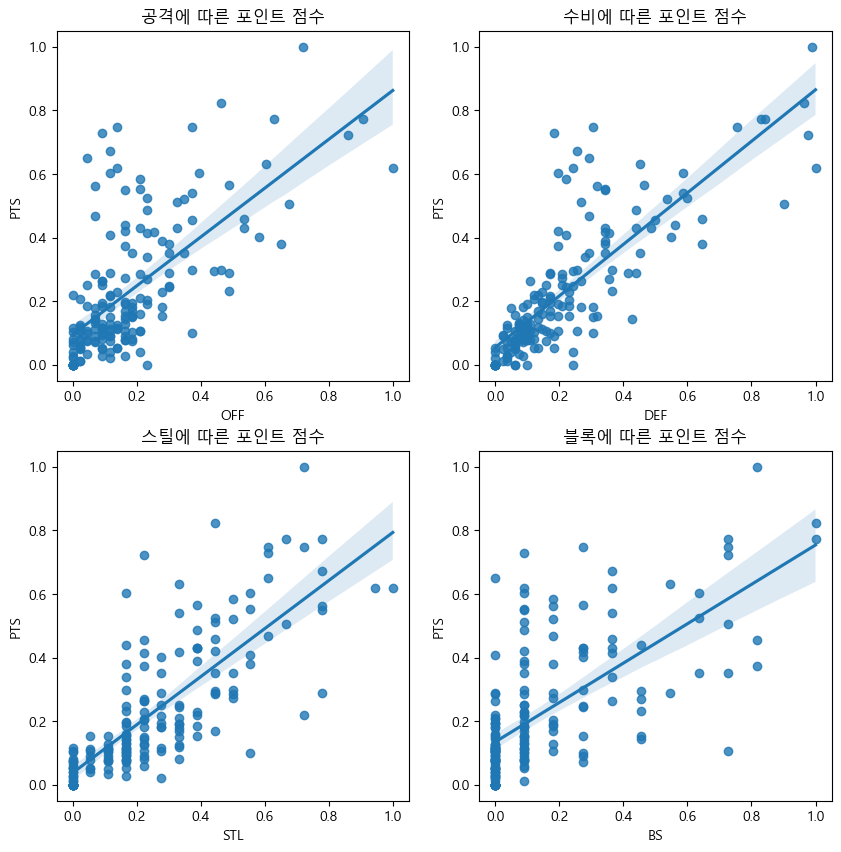

In [128]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.regplot(x='OFF', y = 'PTS', data = df, ax = ax1)
sns.regplot(x='DEF', y = 'PTS', data = df, ax = ax2)
sns.regplot(x='STL', y = 'PTS', data = df, ax = ax3)
sns.regplot(x='BS', y = 'PTS', data = df, ax = ax4)

ax1.set_title('공격에 따른 포인트 점수')
ax2.set_title('수비에 따른 포인트 점수')
ax3.set_title('스틸에 따른 포인트 점수')
ax4.set_title('블록에 따른 포인트 점수')

#### 산점도와 회귀선을 그렸는데 정확한 값을 몰라서 상관계수를 알아봄

In [10]:
print(df[['OFF', 'PTS']].corr())
print(df[['DEF', 'PTS']].corr())
print(df[['STL', 'PTS']].corr())
print(df[['BS', 'PTS']].corr())

          OFF       PTS
OFF  1.000000  0.660555
PTS  0.660555  1.000000
          DEF       PTS
DEF  1.000000  0.814498
PTS  0.814498  1.000000
          STL       PTS
STL  1.000000  0.780311
PTS  0.780311  1.000000
           BS       PTS
BS   1.000000  0.659242
PTS  0.659242  1.000000


#### PTS와 관련이 깊은 순서는 DEF : 0.81, STL : 0.78, OFF : 0.66, BS : 0.66으로 깊은 관계가 있다고 볼 수 있다.

#### 득점보다 오히려 방어와 관련이 더 있다

#### 각 선수별 득점과 관련된 원인별 내림차순으로 정렬

In [11]:
sorted_df_DEF = df.sort_values(by = 'DEF', ascending=False)
sorted_df_STL = df.sort_values(by = 'STL', ascending=False)
sorted_df_OFF = df.sort_values(by = 'OFF', ascending=False)
sorted_df_BS = df.sort_values(by = 'BS', ascending=False)

In [12]:
sorted_df_DEF = sorted_df_DEF[:6]
sorted_df_DEF.set_index('선수명', inplace=True)
sorted_df_DEF

,팀,PTS,OFF,DEF,STL,BS
선수명,,,,,,
아셈 마레이,창원 LG,15.0,4.3,8.2,1.8,0.4
자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
라건아,전주 KCC,17.5,3.7,8.0,0.4,0.8
오마리 스펠맨,안양 KGC,19.9,2.0,7.9,0.8,1.1
머피 할로웨이,대구 한국가스공사,12.2,2.9,7.4,1.2,0.8
디드릭 로슨,고양 캐롯,18.7,2.7,6.9,1.2,1.1


In [13]:
sorted_df_STL = sorted_df_STL[:6]
sorted_df_STL.set_index('선수명', inplace=True)
sorted_df_STL

,팀,PTS,OFF,DEF,STL,BS
선수명,,,,,,
아셈 마레이,창원 LG,15.0,4.3,8.2,1.8,0.4
이정현,고양 캐롯,15.0,0.6,2.0,1.7,0.1
김선형,서울 SK,16.3,0.5,2.1,1.4,0.4
문성곤,안양 KGC,7.0,2.1,3.4,1.4,0.2
게이지 프림,울산 현대모비스,18.7,3.9,6.8,1.4,0.8
론제이 아바리엔토스,울산 현대모비스,13.6,0.3,2.6,1.4,0.2


In [14]:
sorted_df_OFF = sorted_df_OFF[:6]
sorted_df_OFF.set_index('선수명', inplace=True)
sorted_df_OFF

,팀,PTS,OFF,DEF,STL,BS
선수명,,,,,,
아셈 마레이,창원 LG,15.0,4.3,8.2,1.8,0.4
게이지 프림,울산 현대모비스,18.7,3.9,6.8,1.4,0.8
라건아,전주 KCC,17.5,3.7,8.0,0.4,0.8
자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
머피 할로웨이,대구 한국가스공사,12.2,2.9,7.4,1.2,0.8
레나드 프리먼,원주 DB,9.2,2.8,5.3,1.0,0.2


In [15]:
sorted_df_BS = sorted_df_BS[:6]
sorted_df_BS.set_index('선수명', inplace=True)
sorted_df_BS

,팀,PTS,OFF,DEF,STL,BS
선수명,,,,,,
디드릭 로슨,고양 캐롯,18.7,2.7,6.9,1.2,1.1
오마리 스펠맨,안양 KGC,19.9,2.0,7.9,0.8,1.1
자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
렌즈 아반도,안양 KGC,9.0,0.7,1.6,0.4,0.9
김종규,원주 DB,11.0,1.6,4.1,0.4,0.9
재로드 존스,수원 KT,18.1,1.6,6.2,1.1,0.8


,팀,PTS,OFF,DEF,STL,BS
선수명,,,,,,
디드릭 로슨,고양 캐롯,18.7,2.7,6.9,1.2,1.1
오마리 스펠맨,안양 KGC,19.9,2.0,7.9,0.8,1.1
자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
렌즈 아반도,안양 KGC,9.0,0.7,1.6,0.4,0.9
김종규,원주 DB,11.0,1.6,4.1,0.4,0.9
재로드 존스,수원 KT,18.1,1.6,6.2,1.1,0.8


#### 상위에 있는 사람들의 중복을 제거하고 하나의 후보 선수 데이터프레임으로 합쳤다

In [16]:
df_HUBO = pd.concat([sorted_df_BS, sorted_df_DEF, sorted_df_OFF, sorted_df_STL])
df_HUBO.drop_duplicates(inplace=True)

In [17]:
df_HUBO.drop('팀', axis=1, inplace=True)

In [18]:
df_HUBO

,PTS,OFF,DEF,STL,BS
선수명,,,,,
디드릭 로슨,18.7,2.7,6.9,1.2,1.1
오마리 스펠맨,19.9,2.0,7.9,0.8,1.1
자밀 워니,24.2,3.1,8.1,1.3,0.9
렌즈 아반도,9.0,0.7,1.6,0.4,0.9
김종규,11.0,1.6,4.1,0.4,0.9
재로드 존스,18.1,1.6,6.2,1.1,0.8
아셈 마레이,15.0,4.3,8.2,1.8,0.4
라건아,17.5,3.7,8.0,0.4,0.8
머피 할로웨이,12.2,2.9,7.4,1.2,0.8


#### 서울 삼성팀에 영입할 선수 후보는 아셈마레이, 자밀 워니, 라건아등 15명이다.

#### 각 변수별로 값의 범위 차이가 나기 때문에 정규화를 통해 통일시켜줌

In [19]:
min_x = df_HUBO - df_HUBO.min()
min_max= df_HUBO.max() - df_HUBO.min()
df_HUBO = min_x / min_max

#### 가중치를 통해 계산함

In [20]:
df_HUBO["result"] = (df_HUBO["OFF"] * 0.3) + (df_HUBO["DEF"] * 0.3) + (df_HUBO["STL"] * 0.2) + (df_HUBO["BS"] * 0.2)
df_HUBO

,PTS,OFF,DEF,STL,BS,result
선수명,,,,,,
디드릭 로슨,0.680233,0.600,0.803030,0.571429,1.0,0.735195
오마리 스펠맨,0.750000,0.425,0.954545,0.285714,1.0,0.671006
자밀 워니,1.000000,0.700,0.984848,0.642857,0.8,0.794026
렌즈 아반도,0.116279,0.100,0.000000,0.000000,0.8,0.190000
김종규,0.232558,0.325,0.378788,0.000000,0.8,0.371136
재로드 존스,0.645349,0.325,0.696970,0.500000,0.7,0.546591
아셈 마레이,0.465116,1.000,1.000000,1.000000,0.3,0.860000
라건아,0.610465,0.850,0.969697,0.000000,0.7,0.685909
머피 할로웨이,0.302326,0.650,0.878788,0.571429,0.7,0.712922


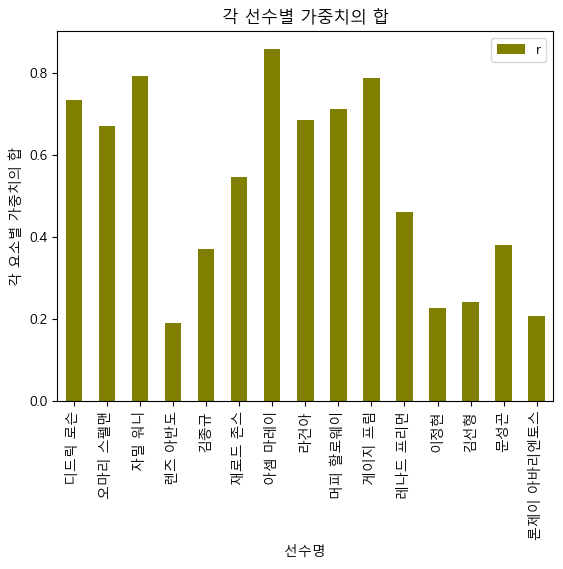

In [58]:
df_HUBO.result.plot(kind = 'bar', color = 'olive')
plt.ylabel('각 요소별 가중치의 합')
plt.title('각 선수별 가중치의 합')
plt.legend('result')
plt.show()

#### 각 선수별 가중치 값의 결과를 막대그래프로 나타내었다. 값이 비슷한 선수들도 있고 그렇지 않은 선수들도 있다. 
#### 그러나 구단이 운영될 때 연봉도 무시할 수 없으므로 연봉에 비해 실력이 괜찮은 사람인지 비율을 구해야 한다.

#### 후보선수들의 연봉컬럼 가져오기

In [22]:
df_HUBO.to_excel('HUBO.xlsx')

In [61]:
file_hubo_ss = 'HUBO_ss.xlsx'
hubodf = pd.read_excel(file_hubo_ss)
# 연봉을 찾을 수 없는 선수들은 어쩔 수 없이 제외함
hubodf.dropna(inplace=True)
hubodf

,선수명,PTS,OFF,DEF,STL,BS,result,연봉
0,디드릭 로슨,0.680233,0.600,0.803030,0.571429,1.0,0.735195,600000000.0
1,오마리 스펠맨,0.750000,0.425,0.954545,0.285714,1.0,0.671006,900000000.0
2,자밀 워니,1.000000,0.700,0.984848,0.642857,0.8,0.794026,800000000.0
3,렌즈 아반도,0.116279,0.100,0.000000,0.000000,0.8,0.190000,230000000.0
4,김종규,0.232558,0.325,0.378788,0.000000,0.8,0.371136,700000000.0
6,아셈 마레이,0.465116,1.000,1.000000,1.000000,0.3,0.860000,600000000.0
7,라건아,0.610465,0.850,0.969697,0.000000,0.7,0.685909,500000000.0
8,머피 할로웨이,0.302326,0.650,0.878788,0.571429,0.7,0.712922,570000000.0
9,게이지 프림,0.680233,0.900,0.787879,0.714286,0.7,0.789221,420000000.0
10,레나드 프리먼,0.127907,0.625,0.560606,0.428571,0.1,0.461396,500000000.0


#### 후보 선수들의 연봉을 파이차트로 비율 표현

In [109]:
hubodf['연봉 퍼센트'] = (hubodf['연봉'] / hubodf.연봉.sum() ) * 100
hubodf

,index,PTS,OFF,DEF,STL,BS,result,연봉,ratio,연봉 퍼센트
선수명,,,,,,,,,,
디드릭 로슨,0,0.680233,0.600,0.803030,0.571429,1.0,0.735195,600000000.0,1.225325,8.141113
오마리 스펠맨,1,0.750000,0.425,0.954545,0.285714,1.0,0.671006,900000000.0,0.745563,12.211669
자밀 워니,2,1.000000,0.700,0.984848,0.642857,0.8,0.794026,800000000.0,0.992532,10.854817
렌즈 아반도,3,0.116279,0.100,0.000000,0.000000,0.8,0.190000,230000000.0,0.826087,3.120760
김종규,4,0.232558,0.325,0.378788,0.000000,0.8,0.371136,700000000.0,0.530195,9.497965
아셈 마레이,6,0.465116,1.000,1.000000,1.000000,0.3,0.860000,600000000.0,1.433333,8.141113
라건아,7,0.610465,0.850,0.969697,0.000000,0.7,0.685909,500000000.0,1.371818,6.784261
머피 할로웨이,8,0.302326,0.650,0.878788,0.571429,0.7,0.712922,570000000.0,1.250740,7.734057
게이지 프림,9,0.680233,0.900,0.787879,0.714286,0.7,0.789221,420000000.0,1.879097,5.698779


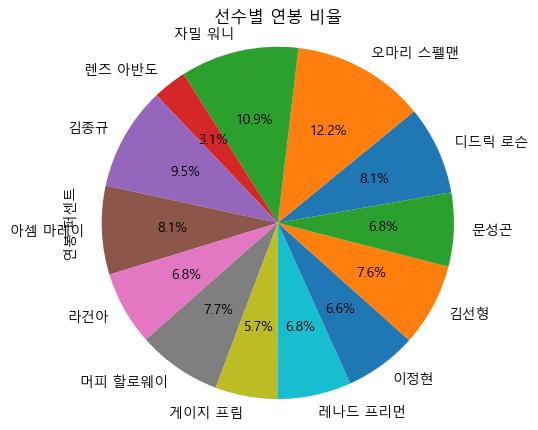

In [129]:
hubodf['연봉 퍼센트'].plot(kind = 'pie', autopct = '%1.1f%%', startangle = 10, figsize = (5, 5))
plt.title('선수별 연봉 비율')
plt.axis('equal')
plt.show()

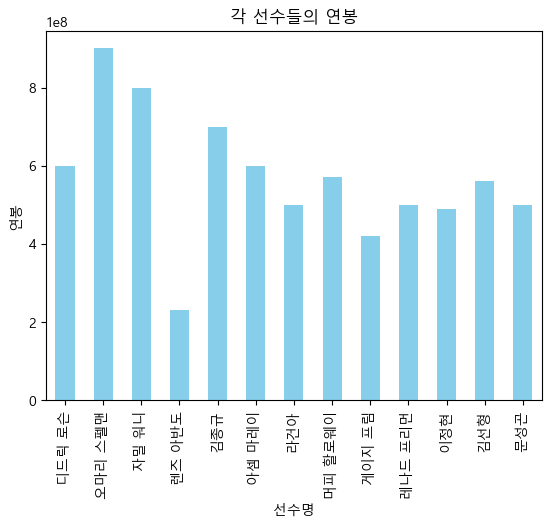

In [130]:
hubodf.연봉.plot(kind = 'bar', color = 'skyblue')
plt.ylabel('연봉')
plt.title('각 선수들의 연봉')
plt.show()

#### 오마리 스펠맨선수나 김종규 선수가 연봉을 많이 가지고 있다는 것을 알 수 있다. 연봉만큼의 실력이 있는지 알아봐야 한다.

#### 연봉과 result의 상관관계

Text(0.5, 1.0, '후보 선수들의 연봉과 가중치 합의 산점도')

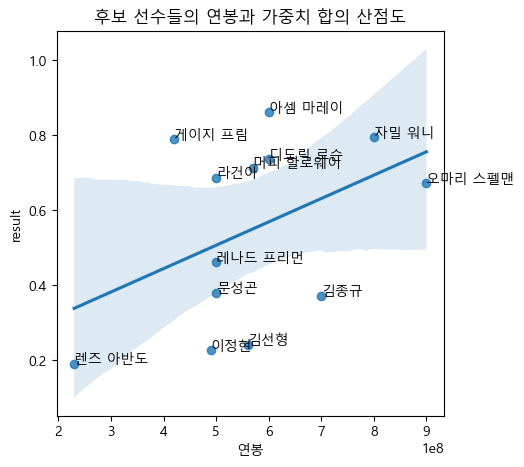

In [131]:
hubodf=hubodf.reset_index()
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(1, 1, 1)

sns.regplot(x = '연봉', y = 'result', data = hubodf)

for i in range(len(hubodf.index)):
    ax1.annotate(hubodf['선수명'].values[i], xy = (hubodf['연봉'].values[i], hubodf['result'].values[i]))

ax1.set_title('후보 선수들의 연봉과 가중치 합의 산점도')

#### 연봉이 커질수록 result가 커지지만 선 아래에 해당하는 선수들은 뽑을 필요가 없다고 생각이 든다

#### 연봉 대비 각각의 가중치에 대한 값을 구하기
- result / 연봉

In [72]:
hubodf['ratio'] = (hubodf['result'] / hubodf['연봉']) * 1000000000
hubodf.set_index('선수명', inplace=True)
hubodf

,index,PTS,OFF,DEF,STL,BS,result,연봉,ratio
선수명,,,,,,,,,
디드릭 로슨,0,0.680233,0.600,0.803030,0.571429,1.0,0.735195,600000000.0,1.225325
오마리 스펠맨,1,0.750000,0.425,0.954545,0.285714,1.0,0.671006,900000000.0,0.745563
자밀 워니,2,1.000000,0.700,0.984848,0.642857,0.8,0.794026,800000000.0,0.992532
렌즈 아반도,3,0.116279,0.100,0.000000,0.000000,0.8,0.190000,230000000.0,0.826087
김종규,4,0.232558,0.325,0.378788,0.000000,0.8,0.371136,700000000.0,0.530195
아셈 마레이,6,0.465116,1.000,1.000000,1.000000,0.3,0.860000,600000000.0,1.433333
라건아,7,0.610465,0.850,0.969697,0.000000,0.7,0.685909,500000000.0,1.371818
머피 할로웨이,8,0.302326,0.650,0.878788,0.571429,0.7,0.712922,570000000.0,1.250740
게이지 프림,9,0.680233,0.900,0.787879,0.714286,0.7,0.789221,420000000.0,1.879097


Text(0, 0.5, '가중치/연봉')

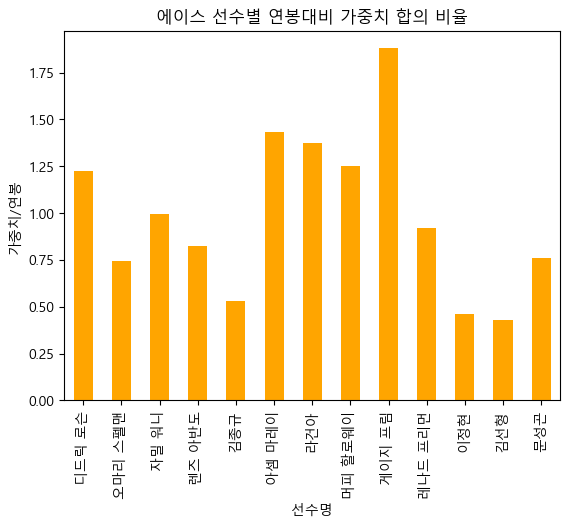

In [76]:
hubodf.ratio.plot(kind = 'bar', color = 'orange')
plt.title('에이스 선수별 연봉대비 가중치 합의 비율')
plt.ylabel('가중치/연봉')

#### 이 그래프를 보면 게이지 프림이 월등히 높은 것을 알 수 있고 그 다음으로는 아셈 마레이, 라건아, 머피 할로웨이 등 연봉 대비 실력이 괜찮은 선수들을 알 수 있다.

#### 서울삼성 선수들 중 연봉 대비 실력이 부진한 선수들을 방출

In [85]:
file_ss = '서울삼성.xlsx'
ssdf = pd.read_excel(file_ss)
ssdf.drop([0], inplace=True)
ssdf.dropna(inplace=True)
ssdf = ssdf[['선수명', '팀', 'PTS', 'OFF', 'DEF', 'STL', 'BS', '연봉']]
ssdf.set_index(['선수명'], inplace = True)
ssdf.drop('팀', axis = 1, inplace=True)
ssdf

,PTS,OFF,DEF,STL,BS,연봉
선수명,,,,,,
이정현,11.7,0.5,2.3,0.6,0.1,700000000.0
이원석,9.5,2.1,4.0,0.9,0.8,150000000.0
이호현,8.3,0.5,1.7,0.6,0.0,60000000.0
김시래,7.0,0.8,1.4,0.7,0.0,500000000.0
이동엽,6.0,1.2,1.9,0.8,0.1,300000000.0
신동혁,5.7,0.6,1.1,0.3,0.0,60000000.0
김진영,4.7,0.8,1.0,0.7,0.1,35000000.0
장민국,4.3,0.8,1.3,0.3,0.1,300000000.0
차민석,3.3,0.4,1.1,0.1,0.0,70000000.0


#### 나머지 팀들에 대한 연봉 파이 차트

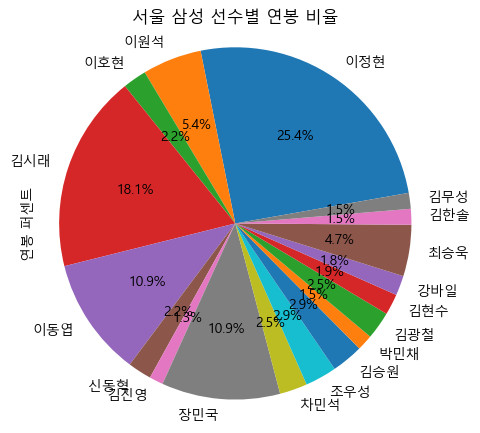

In [132]:
ssdf['연봉 퍼센트'] = (ssdf['연봉'] / ssdf.연봉.sum() ) * 100

ssdf['연봉 퍼센트'].plot(kind = 'pie', autopct = '%1.1f%%', startangle = 10, figsize = (5, 5))
plt.title('서울 삼성 선수별 연봉 비율')
plt.axis('equal')
plt.show()

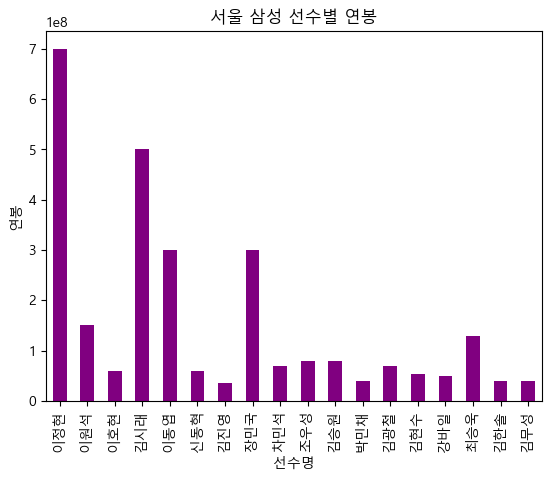

In [86]:
ssdf.연봉.plot(kind = 'bar', color = 'purple')
plt.ylabel('연봉')
plt.title('서울 삼성 선수별 연봉')
plt.show()

In [87]:
ssdf.fillna(0)
ssdf2 = ssdf.copy()

#### 정규화 및 가중치

In [88]:
# ssdf_ = ssdf['연봉']
# ssdf.drop(['연봉'], axis = 1, inplace=True)
min_x = ssdf - ssdf.min()
ssdf
min_max= ssdf.max() - ssdf.min()
ssdf = min_x / min_max

ssdf["result"] = (ssdf["OFF"] * 0.3 ) + (ssdf["DEF"] * 0.3) + (ssdf["STL"] * 0.2) + (ssdf["BS"] * 0.2)
ssdf["연봉"] = ssdf2["연봉"]
ssdf

,PTS,OFF,DEF,STL,BS,연봉,result
선수명,,,,,,,
이정현,1.000000,0.238095,0.575,0.6,0.125,700000000.0,0.388929
이원석,0.811966,1.000000,1.000,0.9,1.000,150000000.0,0.980000
이호현,0.709402,0.238095,0.425,0.6,0.000,60000000.0,0.318929
김시래,0.598291,0.380952,0.350,0.7,0.000,500000000.0,0.359286
이동엽,0.512821,0.571429,0.475,0.8,0.125,300000000.0,0.498929
신동혁,0.487179,0.285714,0.275,0.3,0.000,60000000.0,0.228214
김진영,0.401709,0.380952,0.250,0.7,0.125,35000000.0,0.354286
장민국,0.367521,0.380952,0.325,0.3,0.125,300000000.0,0.296786
차민석,0.282051,0.190476,0.275,0.1,0.000,70000000.0,0.159643


#### 수원삼성 선수들의 연봉별 가중치 합의 산점도

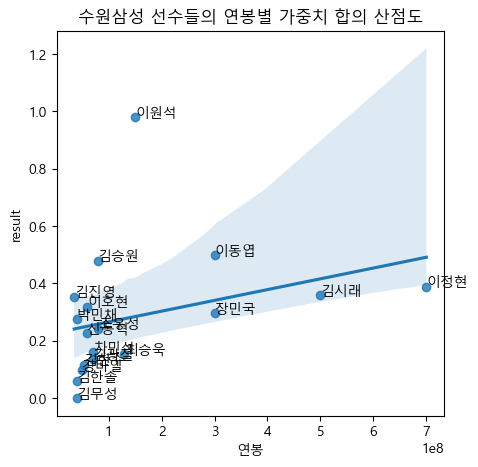

In [133]:
ssdf=ssdf.reset_index()
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(1, 1, 1)

sns.regplot(x = '연봉', y = 'result', data = ssdf)

for i in range(len(ssdf.index)):
    ax1.annotate(ssdf['선수명'].values[i], xy = (ssdf['연봉'].values[i], ssdf['result'].values[i]))

ssdf.set_index(['선수명'], inplace=True)
plt.title('수원삼성 선수들의 연봉별 가중치 합의 산점도')
plt.show()

#### 이 그래프에서 보면 연봉이 높다고 해서 실력이 괜찮은 선수들이라고 보기 힘들다.
#### 회귀선보다 낮은 선수들은 이정현, 장민국, 김시래등의 선수들이 있는데 정확히 알아보기 위해 연봉대비 비율을 확인해봤다.

In [95]:
ssdf.corr().loc[['연봉', 'result']]

,PTS,OFF,DEF,STL,BS,연봉,result
연봉,0.675767,0.200287,0.409487,0.317189,0.051628,1.000000,0.311008
result,0.689924,0.886840,0.941923,0.689082,0.727448,0.311008,1.000000


#### 연봉은 작지만 실력이 괜찮은 선수들은 계속 데리고 있고 연봉은 높지만 실력이 낮은 선수들을 방출하기로 결정했다.

#### 연봉대비 실력의 비율 구하기

In [96]:
ssdf['ratio'] = (ssdf['result'] / ssdf['연봉']) * 1000000000
ssdf

,PTS,OFF,DEF,STL,BS,연봉,result,ratio
선수명,,,,,,,,
이정현,1.000000,0.238095,0.575,0.6,0.125,700000000.0,0.388929,0.555612
이원석,0.811966,1.000000,1.000,0.9,1.000,150000000.0,0.980000,6.533333
이호현,0.709402,0.238095,0.425,0.6,0.000,60000000.0,0.318929,5.315476
김시래,0.598291,0.380952,0.350,0.7,0.000,500000000.0,0.359286,0.718571
이동엽,0.512821,0.571429,0.475,0.8,0.125,300000000.0,0.498929,1.663095
신동혁,0.487179,0.285714,0.275,0.3,0.000,60000000.0,0.228214,3.803571
김진영,0.401709,0.380952,0.250,0.7,0.125,35000000.0,0.354286,10.122449
장민국,0.367521,0.380952,0.325,0.3,0.125,300000000.0,0.296786,0.989286
차민석,0.282051,0.190476,0.275,0.1,0.000,70000000.0,0.159643,2.280612


#### 우리 팀에서 방출시킬 선수 구하기

In [97]:
ssdf.sort_values(by = 'ratio', ascending=False)

,PTS,OFF,DEF,STL,BS,연봉,result,ratio
선수명,,,,,,,,
김진영,0.401709,0.380952,0.250,0.7,0.125,35000000.0,0.354286,10.122449
박민채,0.170940,0.000000,0.250,1.0,0.000,40000000.0,0.275000,6.875000
이원석,0.811966,1.000000,1.000,0.9,1.000,150000000.0,0.980000,6.533333
김승원,0.179487,0.857143,0.475,0.4,0.000,80000000.0,0.479643,5.995536
이호현,0.709402,0.238095,0.425,0.6,0.000,60000000.0,0.318929,5.315476
신동혁,0.487179,0.285714,0.275,0.3,0.000,60000000.0,0.228214,3.803571
조우성,0.179487,0.380952,0.275,0.1,0.125,80000000.0,0.241786,3.022321
차민석,0.282051,0.190476,0.275,0.1,0.000,70000000.0,0.159643,2.280612
김현수,0.119658,0.095238,0.025,0.4,0.000,53000000.0,0.116071,2.190027


#### 위에 산점도와 회귀선에서 봤듯이 장민국, 김시래, 이정현 선수들이 비율이 낮은 것을 알 수 있다.
#### 그러므로 장민국, 김시래, 이정현, 김무성 선수들을 방출시키기로 결정했다.

#### ratio별 하위 4명을 방출

In [98]:
ssdf.sort_values(by = 'ratio', ascending=False)[-4:].연봉.sum()

1540000000.0

#### 약 하위 4명의 연봉은 15억 4천임을 알 수 있다.

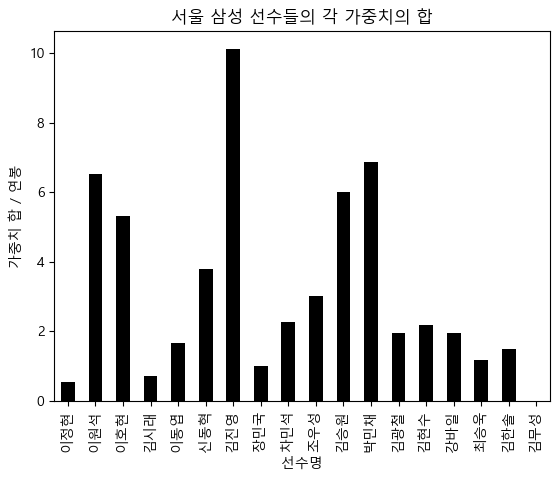

In [138]:
ssdf.ratio.plot(kind = 'bar', color = 'black')
plt.title('서울 삼성 선수들의 각 가중치의 합')
plt.ylabel('가중치 합 / 연봉')
plt.show()

#### 다른 팀 선수 구성

In [38]:
hubodf.sort_values(by = 'ratio', ascending=False)

,index,PTS,OFF,DEF,STL,BS,result,연봉,ratio
선수명,,,,,,,,,
게이지 프림,9,0.680233,0.900,0.787879,0.714286,0.7,0.789221,420000000.0,1.879097
아셈 마레이,6,0.465116,1.000,1.000000,1.000000,0.3,0.860000,600000000.0,1.433333
라건아,7,0.610465,0.850,0.969697,0.000000,0.7,0.685909,500000000.0,1.371818
머피 할로웨이,8,0.302326,0.650,0.878788,0.571429,0.7,0.712922,570000000.0,1.250740
디드릭 로슨,0,0.680233,0.600,0.803030,0.571429,1.0,0.735195,600000000.0,1.225325
자밀 워니,2,1.000000,0.700,0.984848,0.642857,0.8,0.794026,800000000.0,0.992532
레나드 프리먼,10,0.127907,0.625,0.560606,0.428571,0.1,0.461396,500000000.0,0.922792
렌즈 아반도,3,0.116279,0.100,0.000000,0.000000,0.8,0.190000,230000000.0,0.826087
문성곤,13,0.000000,0.450,0.272727,0.714286,0.1,0.379675,500000000.0,0.759351


In [39]:
ssdf.sort_values(by = 'ratio', ascending=False)

,PTS,OFF,DEF,STL,BS,연봉,result,ratio
선수명,,,,,,,,
김진영,0.401709,0.380952,0.250,0.7,0.125,35000000.0,0.354286,10.122449
박민채,0.170940,0.000000,0.250,1.0,0.000,40000000.0,0.275000,6.875000
이원석,0.811966,1.000000,1.000,0.9,1.000,150000000.0,0.980000,6.533333
김승원,0.179487,0.857143,0.475,0.4,0.000,80000000.0,0.479643,5.995536
이호현,0.709402,0.238095,0.425,0.6,0.000,60000000.0,0.318929,5.315476
신동혁,0.487179,0.285714,0.275,0.3,0.000,60000000.0,0.228214,3.803571
조우성,0.179487,0.380952,0.275,0.1,0.125,80000000.0,0.241786,3.022321
차민석,0.282051,0.190476,0.275,0.1,0.000,70000000.0,0.159643,2.280612
김현수,0.119658,0.095238,0.025,0.4,0.000,53000000.0,0.116071,2.190027


In [40]:
hubodf.sort_values(by = 'ratio', ascending=False)[:4].연봉.sum()

2090000000.0

#### 서울 삼성팀을 제외한 다른 팀의 에이스들 중 ratio가 높은 선수들의 4명과 서울 삼성팀의 ratio가 낮은 4명의 선수들을 트레이드했다.

#### 서울 삼성팀과 다른 팀의 ratio 비교

#### 서울 삼성팀의 변화 비교!

#### 수원삼성 팀 새롭게 구성

In [41]:
ssdf = ssdf.sort_values(by = 'ratio', ascending=False)[:-5]
dd = hubodf.sort_values(by = 'ratio', ascending=False)[:4]
myteam = pd.concat([ssdf, dd])
myteam
myteam.drop(['index'], axis = 1, inplace=True)
myteam

,PTS,OFF,DEF,STL,BS,연봉,result,ratio
선수명,,,,,,,,
김진영,0.401709,0.380952,0.250000,0.700000,0.125,35000000.0,0.354286,10.122449
박민채,0.170940,0.000000,0.250000,1.000000,0.000,40000000.0,0.275000,6.875000
이원석,0.811966,1.000000,1.000000,0.900000,1.000,150000000.0,0.980000,6.533333
김승원,0.179487,0.857143,0.475000,0.400000,0.000,80000000.0,0.479643,5.995536
이호현,0.709402,0.238095,0.425000,0.600000,0.000,60000000.0,0.318929,5.315476
신동혁,0.487179,0.285714,0.275000,0.300000,0.000,60000000.0,0.228214,3.803571
조우성,0.179487,0.380952,0.275000,0.100000,0.125,80000000.0,0.241786,3.022321
차민석,0.282051,0.190476,0.275000,0.100000,0.000,70000000.0,0.159643,2.280612
김현수,0.119658,0.095238,0.025000,0.400000,0.000,53000000.0,0.116071,2.190027


In [42]:
df

,선수명,팀,PTS,OFF,DEF,STL,BS
0,자밀 워니,서울 SK,24.2,3.1,8.1,1.3,0.9
1,김선형,서울 SK,16.3,0.5,2.1,1.4,0.4
2,최준용,서울 SK,12.7,1.0,4.9,0.8,0.7
3,허일영,서울 SK,9.4,1.2,2.8,0.7,0.1
4,최부경,서울 SK,7.2,2.0,3.0,0.9,0.3
...,...,...,...,...,...,...,...
171,이진욱,전주 KCC,2.2,0.3,0.2,0.3,0.0
172,서정현,전주 KCC,1.0,0.9,0.4,0.1,0.0
173,곽정훈,전주 KCC,0.8,0.2,0.6,0.2,0.0
174,박세진,전주 KCC,0.0,0.0,0.0,0.0,0.0


#### 새로만들어진 서울 삼성팀과 나머지팀들을 비교하기 위해 각각의 가중치 합을 구함

In [43]:
df.drop(['선수명'], inplace=True, axis = 1)
df.set_index(['팀'], inplace=True)

In [44]:
min_x = df - df.min()
min_max= df.max() - df.min()
df = min_x / min_max

df["result"] = (df["OFF"] * 0.3 ) + (df["DEF"] * 0.3) + (df["STL"] * 0.2) + (df["BS"] * 0.2)
df

,PTS,OFF,DEF,STL,BS,result
팀,,,,,,
서울 SK,1.000000,0.720930,0.987805,0.722222,0.818182,0.820701
서울 SK,0.673554,0.116279,0.256098,0.777778,0.363636,0.339996
서울 SK,0.524793,0.232558,0.597561,0.444444,0.636364,0.465197
서울 SK,0.388430,0.279070,0.341463,0.388889,0.090909,0.282120
서울 SK,0.297521,0.465116,0.365854,0.500000,0.272727,0.403836
...,...,...,...,...,...,...
전주 KCC,0.090909,0.069767,0.024390,0.166667,0.000000,0.061581
전주 KCC,0.041322,0.209302,0.048780,0.055556,0.000000,0.088536
전주 KCC,0.033058,0.046512,0.073171,0.111111,0.000000,0.058127


In [45]:
grouped = df.groupby(['팀']).result.mean()
grouped

팀
고양 캐롯        0.204491
대구 한국가스공사    0.210274
서울 SK        0.194873
수원 KT        0.219216
안양 KGC       0.195606
울산 현대모비스     0.206657
원주 DB        0.197810
전주 KCC       0.179859
창원 LG        0.199980
Name: result, dtype: float64

In [46]:
myteam.result.mean()

0.41146103896103897

In [47]:
grouped['서울 삼성'] = 0.41146103896103897
grouped.reset_index()

,팀,result
0,고양 캐롯,0.204491
1,대구 한국가스공사,0.210274
2,서울 SK,0.194873
3,수원 KT,0.219216
4,안양 KGC,0.195606
5,울산 현대모비스,0.206657
6,원주 DB,0.197810
7,전주 KCC,0.179859
8,창원 LG,0.199980
9,서울 삼성,0.411461


Text(0, 0.5, '가중치 합')

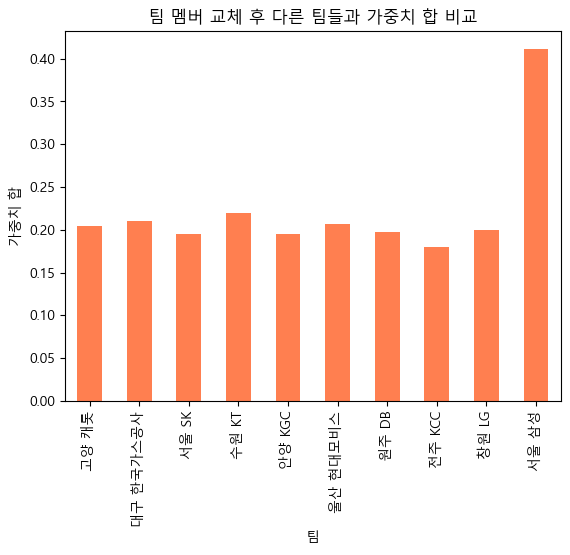

In [137]:
grouped.plot(kind = 'bar', color = 'coral')
plt.title('팀 멤버 교체 후 다른 팀들과 가중치 합 비교')
plt.ylabel('가중치 합')

#### 위에서 가장 포인트랑 관련이 있는 변수를 DEF와 STL에 가중치를 조금 더 많이 줬다

#### 그러므로 서울 삼성팀은 5억 정도 더 투자하면 방어와 스틸 기술이 우수한 팀으로 전과 대비해 좋은 성적을 거둘 것으로 보인다.